In [11]:
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
#fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

#font = fm.FontProperties(fname=fontpath, size=9)

#fm._rebuild()



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트

In [ ]:
import os
os.kill(os.getpid(), 9)

In [144]:
import math
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
sns.set(font_scale = 1)
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

import warnings
warnings.filterwarnings(action='ignore')
cr = pd.read_csv('Korea.csv', encoding='cp949')


In [145]:
#전처리

#지역이 너무 세분화 되어 있으면 시각화가 불분명해지므로, 지역을 합치는 과정

region_mapping = {
    '서울': '서울',
    '부산': '경상도',
    '대구': '경상도',
    '울산': '경상도',
    '경남': '경상도',
    '경북': '경상도',
    '인천': '인천',
    '경기': '경기',
    '강원': '강원',
    '충남': '충청도',
    '충북': '충청도',
    '대전': '충청도',
    '세종': '충청도',
    '전남': '전라도',
    '전북': '전라도',
    '광주': '전라도',
    '제주': '제주'
}
cr['지역'] = cr['시도'].map(region_mapping)
cr = cr.drop('시도', axis=1)
#경쟁률에 특수문자가 들어있는 경우가 있으므로 삭제한 뒤 다시 계산한 열을 포함
#필요한 데이터는 일반공급과 관련된 정보이므로 특별공급을 포함하는 열은 삭제
cr = cr.drop(["특별공급 공급세대수", "특별공급 접수건수", "특별공급 경쟁률", "일반공급 경쟁률"], axis=1)
cr['일반공급 경쟁률'] = cr['일반공급 접수건수'] / cr['일반공급 공급세대수']

#년월을 년도와 월로 분할
cr['년도'] = cr["연월"].apply(lambda x: x.split("-")[0])
cr['월'] = cr["연월"].apply(lambda x: x.split("-")[1])

#nan데이터를 0으로 채우는 과정
cr.fillna(0, inplace=True)

df=pd.DataFrame(cr)
print(df.shape)
df.head()
df.info()

(539, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   연월          539 non-null    object 
 1   일반공급 공급세대수  539 non-null    int64  
 2   일반공급 접수건수   539 non-null    int64  
 3   지역          539 non-null    object 
 4   일반공급 경쟁률    539 non-null    float64
 5   년도          539 non-null    object 
 6   월           539 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 29.6+ KB


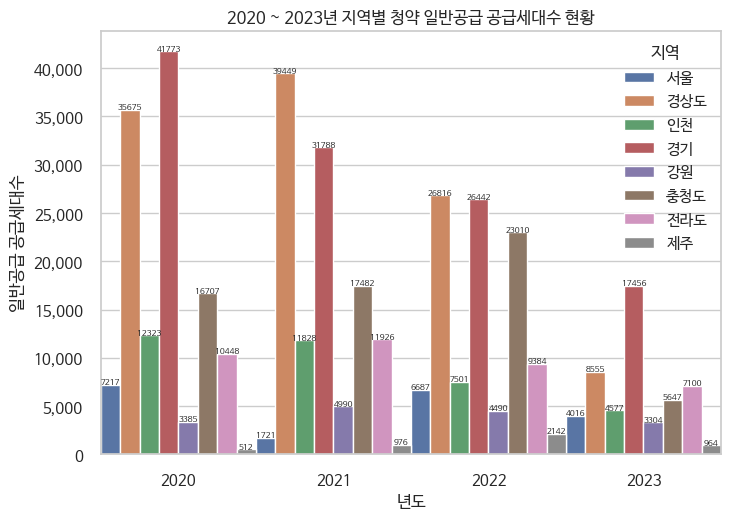

In [149]:
import matplotlib.ticker as ticker
ax = sns.barplot(data=df, x='년도', y='일반공급 공급세대수', hue='지역', width=1, ci=None, estimator=np.sum)
plt.title('2020 ~ 2023년 지역별 청약 일반공급 공급세대수 현황')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# 막대 그래프에 레이블 추가
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height(),   # 세로 위치
            f"{p.get_height():.0f}",
            ha = 'center',
            fontsize=6)
plt.show()

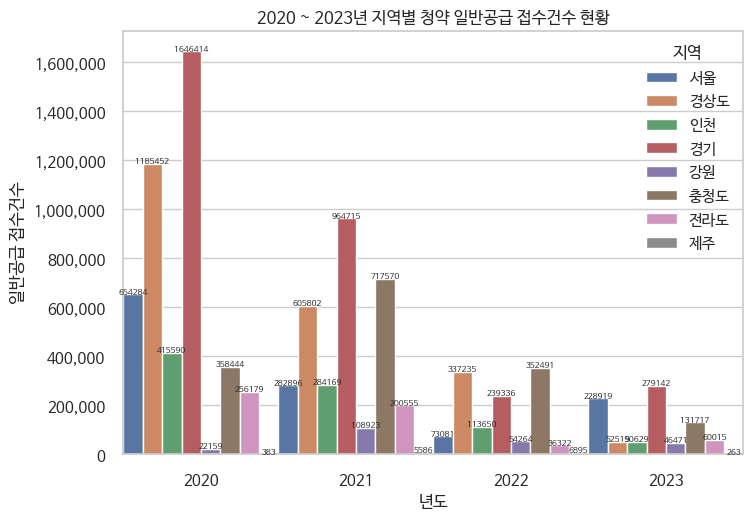

In [150]:
ax = sns.barplot(data=df, x='년도', y='일반공급 접수건수', hue='지역', width=1, ci=None, estimator=np.sum)
plt.title('2020 ~ 2023년 지역별 청약 일반공급 접수건수 현황')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# 막대 그래프에 레이블 추가
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height(),   # 세로 위치
            f"{p.get_height():.0f}",
            ha = 'center',
            fontsize=6)
plt.show()

년도
2020    1646414
2021     964715
2022     239336
2023     279142
Name: 일반공급 접수건수, dtype: int64


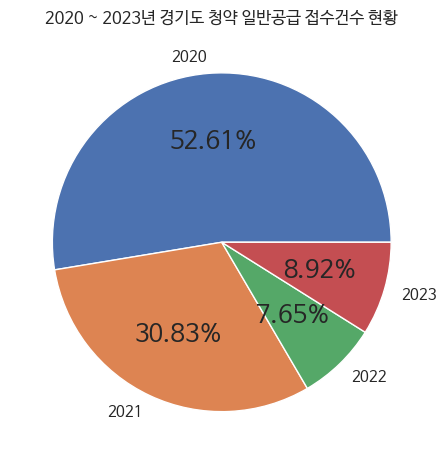

In [151]:
gyeonggi_rows = df[df['지역'] == '경기']

result=gyeonggi_rows.groupby('년도')['일반공급 접수건수'].sum()
print(result)
labels = ['2020', '2021', '2022', '2023']
plt.pie(result, labels = labels, autopct='%.2f%%')
plt.title('2020 ~ 2023년 경기도 청약 일반공급 접수건수 현황')
plt.show()

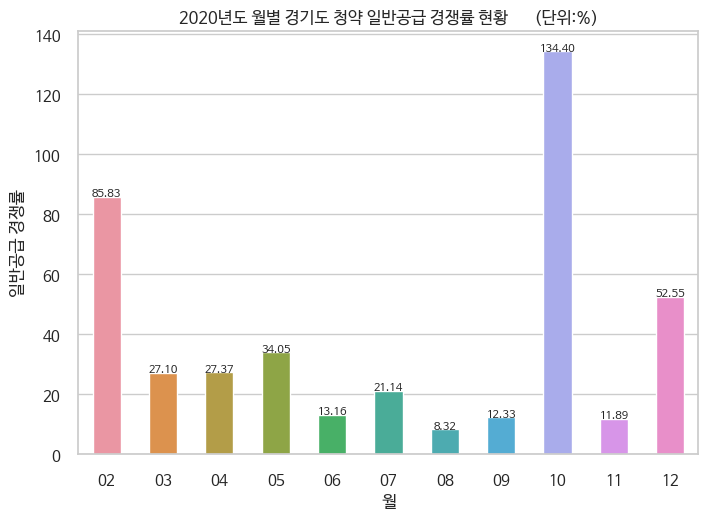

In [152]:
gyeonggi_rows_2020 = gyeonggi_rows[df['년도'] == '2020']
ax = sns.barplot(data=gyeonggi_rows_2020, x='월', y='일반공급 경쟁률', width=0.5, ci=None)
plt.title('2020년도 월별 경기도 청약 일반공급 경쟁률 현황       (단위:%)')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# 막대 그래프에 레이블 추가
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height(),   # 세로 위치
            f"{p.get_height():.2f}",
            ha = 'center',
            fontsize=8)
plt.show()

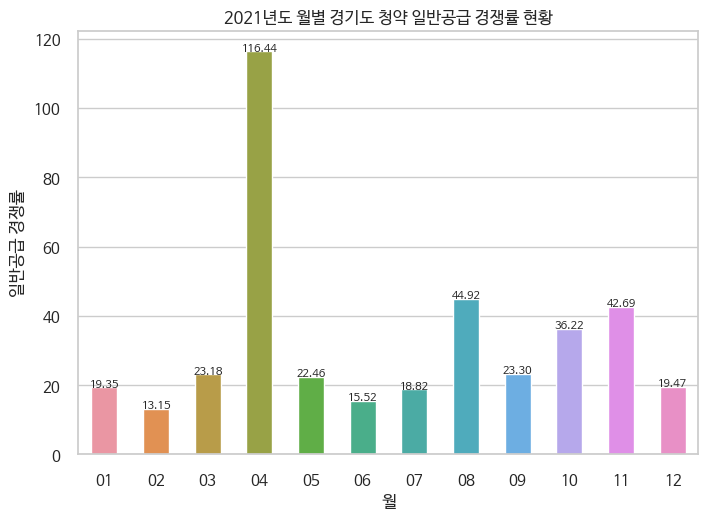

In [153]:
gyeonggi_rows_2021 = gyeonggi_rows[df['년도'] == '2021']
ax = sns.barplot(data=gyeonggi_rows_2021, x='월', y='일반공급 경쟁률', width=0.5, ci=None, estimator=np.sum)
plt.title('2021년도 월별 경기도 청약 일반공급 경쟁률 현황')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# 막대 그래프에 레이블 추가
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height(),   # 세로 위치
            f"{p.get_height():.2f}",
            ha = 'center',
            fontsize=8)
plt.show()

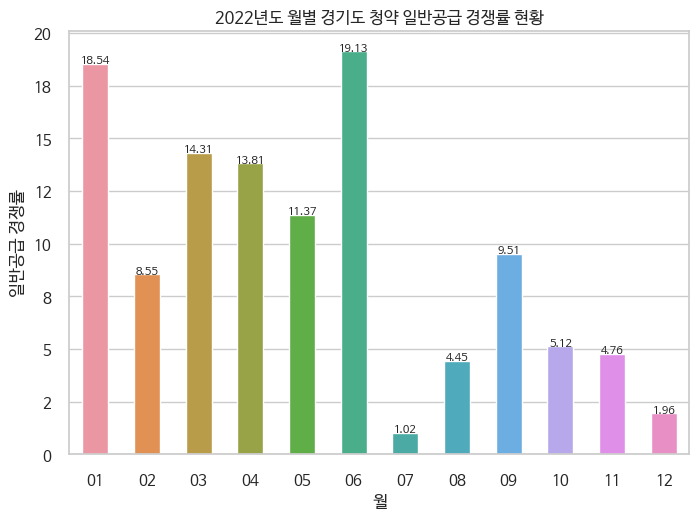

In [154]:
gyeonggi_rows_2022 = gyeonggi_rows[df['년도'] == '2022']
ax = sns.barplot(data=gyeonggi_rows_2022, x='월', y='일반공급 경쟁률', width=0.5, ci=None, estimator=np.sum)
plt.title('2022년도 월별 경기도 청약 일반공급 경쟁률 현황')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# 막대 그래프에 레이블 추가
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height(),   # 세로 위치
            f"{p.get_height():.2f}",
            ha = 'center',
            fontsize=8)
plt.show()

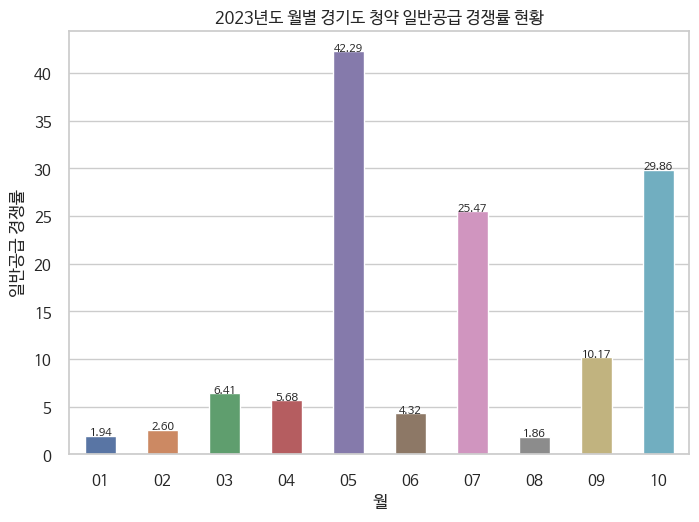

In [155]:
gyeonggi_rows_2023 = gyeonggi_rows[df['년도'] == '2023']
ax = sns.barplot(data=gyeonggi_rows_2023, x='월', y='일반공급 경쟁률', width=0.5, ci=None, estimator=np.sum)
plt.title('2023년도 월별 경기도 청약 일반공급 경쟁률 현황')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# 막대 그래프에 레이블 추가
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height(),   # 세로 위치
            f"{p.get_height():.2f}",
            ha = 'center',
            fontsize=8)
plt.show()

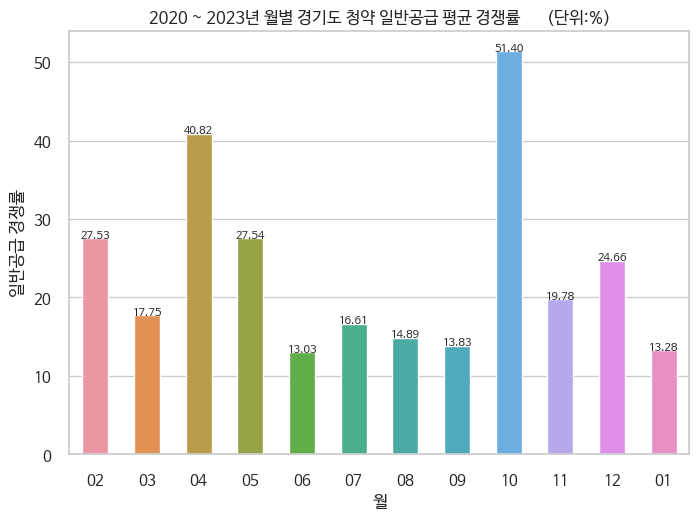

In [156]:
ax = sns.barplot(data=gyeonggi_rows, x='월', y='일반공급 경쟁률', width=0.5, ci=None, estimator = np.average)
plt.title('2020 ~ 2023년 월별 경기도 청약 일반공급 평균 경쟁률       (단위:%)')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# 막대 그래프에 레이블 추가
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) ,   # 가로 위치
            p.get_y() + p.get_height(),   # 세로 위치
            f"{p.get_height():.2f}",
            ha = 'center',
            fontsize=8)
plt.show()